Title: Bank Churn Model

Objective: The aim of this project is to classify the bank customers who have chances of leaving the bank that is churn over here. Now this pattern is not even or balanced so we are considering that even if there is unbalance how by using machine learning suitable model we can increase the performance of the model. Here are points we shall we implementing for project:
1.Data Encoding
2.Feature Scaling
3.Handling Inbalance Data By:
    a.Random Under Sampling
    b.Random Over Sampling
4.Support Vector Machine Classification
5.Grid Search for Hyperparameter tunning.

Data Source:
The dataset for the project has been refered of the YBI-Foundation Bank Churn Model dataset which is available on github. The dataset is called 'Bank Churn Modelling.csv'dataset.

Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import Data

In [2]:
df=pd.read_csv('/kaggle/input/project1-dataset/BankChurnDataset.csv')

Describe Data

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

This indicates no null behaviour of the attributes and also displays sum which is 0 here

Data Visualization: We can use shape to understand the size of the data and understand it.

In [8]:
df.shape

(10000, 13)

Data Preprocessing

This shows that all values in customerid field are unique and can also be used for unique identification of tuple.

In [9]:
df.duplicated('CustomerId').sum()

0

In [10]:
df=df.set_index('CustomerId')

In [11]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Since here we see that values are not regular/numerical or we see their is drastic change from count 5014 to 2477 in spain. So for proper interpretation and use for the model we encode it by use of function as below:

In [13]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

/tmp/ipykernel_18/1985855611.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)


In [14]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)

/tmp/ipykernel_18/1988347549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':1,'Female':0}},inplace=True)


In [16]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

As here number 3 and 4 products are very less hence we club them/merge them into 2

In [17]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [18]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [19]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [20]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

Here we interpret that customers that have zero balance have a large chance of churn so we create another feature as 'Zero Balance'

In [21]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<Axes: >

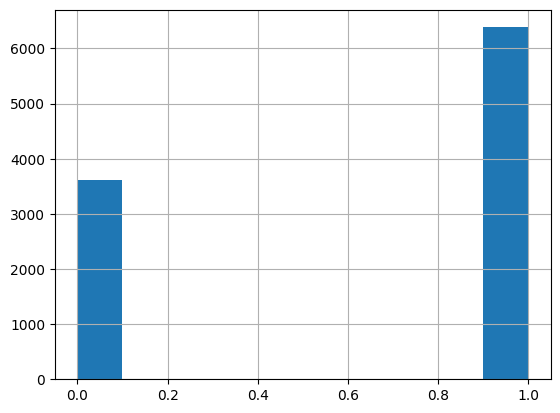

In [22]:
df['Zero Balance'].hist()

In [23]:
df.groupby(['Geography','Churn']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Geography Churn                                                        
0         0         2064         2064    2064  2064    2064     2064   
          1          413          413     413   413     413      413   
1         0         1695         1695    1695  1695    1695     1695   
          1          814          814     814   814     814      814   
2         0         4204         4204    4204  4204    4204     4204   
          1          810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Geography Churn                                                       
0         0                 2064             2064              2064   
          1                  413              413               413   
1         0                 1695             1695              1695   
          1                  814              814               814   
2         0                 4204             4204              4204   
          1                  810              810               810   

                 Estimated Salary  Zero Balance  
Geography Churn                                  
0         0                  2064          2064  
          1                   413           413  
1         0                  1695          1695  
          1                   814           814  
2         0                  4204          4204  
          1                   810           810

In [24]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,2,0,42,2,0.00,0,1,1,101348.88,1,0
15647311,Hill,608,0,0,41,1,83807.86,0,0,1,112542.58,0,1
15619304,Onio,502,2,0,42,8,159660.80,1,1,0,113931.57,1,1
15701354,Boni,699,2,0,39,1,0.00,1,0,0,93826.63,0,0
15737888,Mitchell,850,0,0,43,2,125510.82,0,1,1,79084.10,0,1


In [25]:
Y=df['Churn']

Define Target Variable (y) and Feature Variables (X)

Surname does not participate in prediction and churn is the target feature so we drop them in X

In [26]:
X=df.drop(['Surname','Churn'],axis=1)

In [27]:
X.shape,Y.shape

((10000, 11), (10000,))

In [28]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

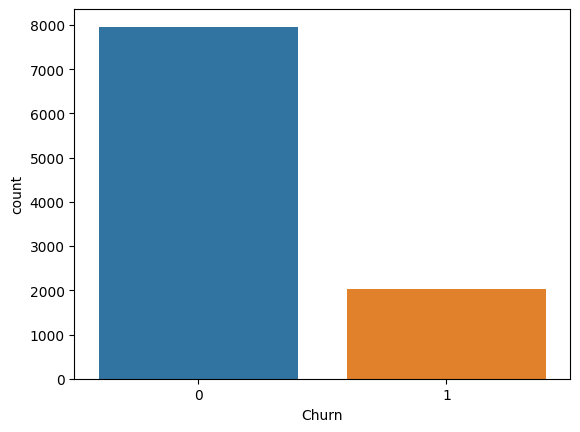

In [29]:
sns.countplot(x='Churn',data=df)

Performing Random Under Sampling Method

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [31]:
rus=RandomUnderSampler(random_state=2529)

In [32]:
X_rus,Y_rus=rus.fit_resample(X,Y)

In [33]:
[[X_rus.shape,Y_rus.shape],[X.shape,Y.shape]]

[[(4074, 11), (4074,)], [(10000, 11), (10000,)]]

In [34]:
Y.value_counts()
Y_rus.value_counts()


Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

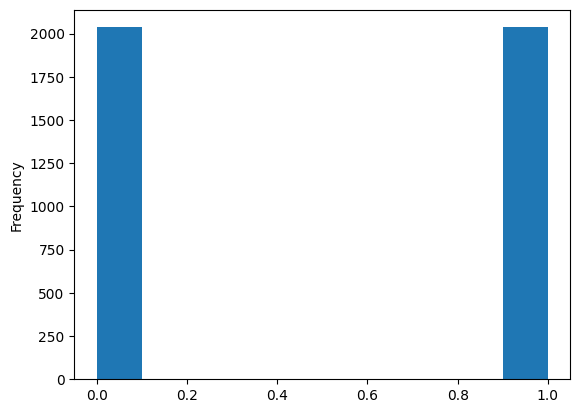

In [35]:
Y_rus.plot(kind='hist')

Performing Random Over Sampling Method

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros=RandomOverSampler(random_state=2529)

In [38]:
X_ros,Y_ros=ros.fit_resample(X,Y)

In [39]:
[[X_ros.shape,Y_ros.shape],[X.shape,Y.shape]]

[[(15926, 11), (15926,)], [(10000, 11), (10000,)]]

In [40]:
Y.value_counts()
Y_ros.value_counts()


Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

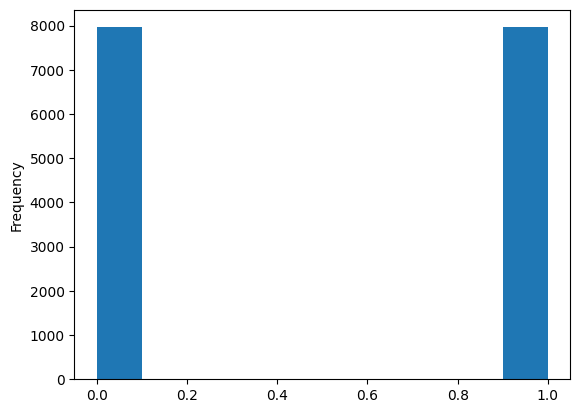

In [41]:
Y_ros.plot(kind='hist')

Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

Spliting The Actual Data first

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2529)

Spliting The Random Over Sampled Data

In [44]:
X_train_ros,X_test_ros,Y_train_ros,Y_test_ros=train_test_split(X_ros,Y_ros,test_size=0.3,random_state=2529)

Spliting The Random Under Sampled Data

In [45]:
X_train_rus,X_test_rus,Y_train_rus,Y_test_rus=train_test_split(X_rus,Y_rus,test_size=0.3,random_state=2529)

Standarizing Feautures

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc=StandardScaler()

In [48]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15771139,578,1,1,34,8,147487.23,1,1,0,66680.77,1
15713463,645,1,0,41,2,138881.04,0,1,0,129936.53,1
15570417,579,2,1,35,1,0.00,1,1,0,4460.20,0
15626243,618,2,1,30,3,133844.22,0,1,1,31406.93,1
15809178,569,1,0,42,9,146100.75,0,1,0,32574.01,1
...,...,...,...,...,...,...,...,...,...,...,...
15723028,778,2,1,33,1,0.00,1,1,0,85439.73,0
15759284,750,2,0,37,6,0.00,0,1,1,117948.00,0
15796218,814,1,1,29,1,131968.57,1,1,1,147693.92,1


Standardize the Actual Data

In [49]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [50]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardize the random undersampled data

In [51]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [52]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardize the random Oversampled data

In [53]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [54]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Modeling:
SVM MODEL used here that is:
A support vector machine (SVM) is a type of supervised learning algorithm used in machine learning to solve classification and regression tasks.

In [55]:
from sklearn.svm import SVC

In [56]:
svm=SVC()

In [57]:
svm.fit(X_train,Y_train)

SVC()

In [58]:
Y_pred=svm.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

SVM Performance On Actual Data

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
confusion_matrix(Y_test,Y_pred)

array([[2381,   33],
       [ 436,  150]])

In [61]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



SVM Model for Random Under Sampled Data

In [62]:
svm1=SVC()

In [63]:
svm1.fit(X_train_rus,Y_train_rus)

SVC()

In [64]:
Y_pred_rus=svm1.predict(X_test_rus)
Y_pred_rus.shape,Y_test_rus.shape

((1223,), (1223,))

Model Evaluation:

SVM Performance for Random Under Sampled Data

In [65]:
confusion_matrix(Y_test_rus,Y_pred_rus)

array([[470, 157],
       [174, 422]])

In [66]:
print(classification_report(Y_test_rus,Y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



SVM Model for Random Over Sampled Data

In [67]:
svm2=SVC()

In [68]:
svm2.fit(X_train_ros,Y_train_ros)

SVC()

In [69]:
Y_pred_ros=svm2.predict(X_test_ros)
Y_pred_ros.shape,Y_test_ros.shape

((4778,), (4778,))

SVM Performance for Random Over Sampled Data

In [70]:
confusion_matrix(Y_test_ros,Y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [71]:
print(classification_report(Y_test_ros,Y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



HyperParameter Tunning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [74]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [75]:
grid.fit(X_train,Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [76]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


Prediction

In [77]:
grid_pred=grid.predict(X_test)

Performance Of SVM on actual data after hyper parameter tunning

Evaluation

In [78]:
confusion_matrix(Y_test,grid_pred)

array([[2159,  255],
       [ 343,  243]])

In [79]:
print(classification_report(Y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [80]:
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [81]:
grid_rus.fit(X_train_rus,Y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [82]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


Prediction

In [83]:
grid_pred_rus=grid.predict(X_test_rus)

Performance Of SVM on random under sampled data after hyper parameter tunning

Evaluation

In [84]:
confusion_matrix(Y_test_rus,grid_pred_rus)

array([[611,  16],
       [105, 491]])

In [85]:
print(classification_report(Y_test_rus,grid_pred_rus))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       627
           1       0.97      0.82      0.89       596

    accuracy                           0.90      1223
   macro avg       0.91      0.90      0.90      1223
weighted avg       0.91      0.90      0.90      1223



In [86]:
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)

In [87]:
grid_ros.fit(X_train_ros,Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [88]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


Prediction

In [89]:
Y_pred_ros=grid_ros.predict(X_test_ros)

Performance Of SVM on random over sampled data after hyper parameter tunning

In [90]:
confusion_matrix(Y_test_ros,Y_pred_ros)

array([[2047,  332],
       [  68, 2331]])

In [91]:
print(classification_report(Y_test_ros,Y_pred_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



Accuracy: Here as we are finding the accuracy for the above model evaluation we also find for all the possible combinations like before and after hyper parameter tunning and from this we conclude at this last technique that gives best accuracy as comapred to other.To compare accuracy we can also check same by changing the set of parameters.

In [92]:
accuracy_score(Y_test_ros,Y_pred_ros)

0.9162829635830891

Explaination

In this project, we have used SVM model to classify bank customers into customers into customers that are most likely to leave /churn by using the dataset availaible to us related to it. We have analyzed data and we performed required steps as per as our objectives that is 1.Data Encoding 2.Feature Scaling 3.Handling Inbalance Data By: a.Random Under Sampling b.Random Over Sampling 4.Support Vector Machine Classification 5.Grid Search for Hyperparameter tunning.We used random sampling both methods to handle various imbalances in the data.We then also performed a accuracy test of svm model by using actual data,random oversampled data and random undersampled data which first came to be quite close then we used hyperparameter tunning for improving the model and performed same for all the cases. And finally we found out that'** Accuarcy of SVM model after hyperparameter tuning which was trained using random oversampled data was the maximum'.That was 91%approx**.Hence, we concluded that model trained using random oversampled data & after hyperparameter tunning is most accurate,efficient to be used for our task.